# 2. train model

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## 2.1 load and inpsect data

In [42]:
X_train = np.load("../data/X_train.npy")
y_train = np.load("../data/y_train.npy")

X_val = np.load("../data/X_val.npy")
y_val = np.load("../data/y_val.npy")

X_test = np.load("../data/X_test.npy")
y_test = np.load("../data/y_test.npy")

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (294359, 12, 13)
y_train shape: (294359, 13)


## 2.2 train the model

In [43]:
model = Sequential([
    Input(shape=(12, 13)), # 12 time steps with 13 features each
    LSTM(
        64, # 64 neurons
        return_sequences=False # predict only one step ahead
    ),
    Dropout(0.2), # randomly turn off 20% neurons during training to reduce overfitting
    Dense(32, activation='relu'), # intermediate layer
    Dense(13)  # output 13 predicted features
])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 13)             │           429 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,477 (87.80 KB)

 Trainable params: 22,477 (87.80 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
optimizer = Adam( # 
    learning_rate=0.001 # how big a step the optimizer takes in each weight update
)
model.compile(
    optimizer=optimizer, 
    loss='mse', # mean square error for calculating loss function - model trains on it
    metrics=['mae'] # mean absolute error for evaluation - easier to interpret
)

In [46]:
history = model.fit(
    X_train, y_train, # training input and targets
    validation_data=(X_val, y_val), # validation input and targets to avoid overfitting
    epochs=50, # no of epochs
    batch_size=64, # batch size
    verbose=1 # for monitoring progress
)

model.save("../models/lstm_weather.keras")

Epoch 1/50
4600/4600 ━━━━━━━━━━━━━━━━━━━━ 137s 30ms/step - loss: 0.0023 - mae: 0.0212 - val_loss: 0.0024 - val_mae: 0.0209
Epoch 2/50
4600/4600 ━━━━━━━━━━━━━━━━━━━━ 197s 43ms/step - loss: 0.0022 - mae: 0.0191 - val_loss: 0.0024 - val_mae: 0.0231
Epoch 3/50
4600/4600 ━━━━━━━━━━━━━━━━━━━━ 143s 31ms/step - loss: 0.0021 - mae: 0.0183 - val_loss: 0.0025 - val_mae: 0.0247
Epoch 4/50
4600/4600 ━━━━━━━━━━━━━━━━━━━━ 252s 55ms/step - loss: 0.0021 - mae: 0.0179 - val_loss: 0.0026 - val_mae: 0.0261
Epoch 5/50
4600/4600 ━━━━━━━━━━━━━━━━━━━━ 184s 38ms/step - loss: 0.0021 - mae: 0.0176 - val_loss: 0.0026 - val_mae: 0.0264
Epoch 6/50
4600/4600 ━━━━━━━━━━━━━━━━━━━━ 171s 37ms/step - loss: 0.0021 - mae: 0.0174 - val_loss: 0.0027 - val_mae: 0.0274
Epoch 7/50
4600/4600 ━━━━━━━━━━━━━━━━━━━━ 89s 19ms/step - loss: 0.0021 - mae: 0.0172 - val_loss: 0.0027 - val_mae: 0.0266
Epoch 8/50
4600/4600 ━━━━━━━━━━━━━━━━━━━━ 92s 20ms/step - loss: 0.0021 - mae: 0.0171 - val_loss: 0.0027 - val_mae: 0.0272
Epoch 9/50
4600/46

## 2.3 plot loss curves

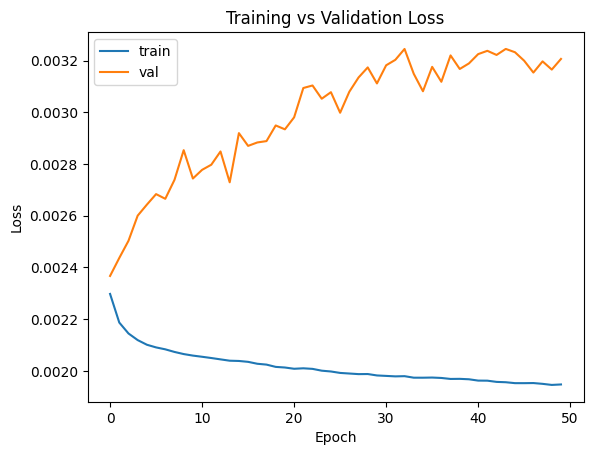

In [47]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

## 2.4 evaluate on test set 

In [48]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print("Test MAE:", test_mae)

1971/1971 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.0027 - mae: 0.0296
Test MAE: 0.029587874189019203


1971/1971 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step


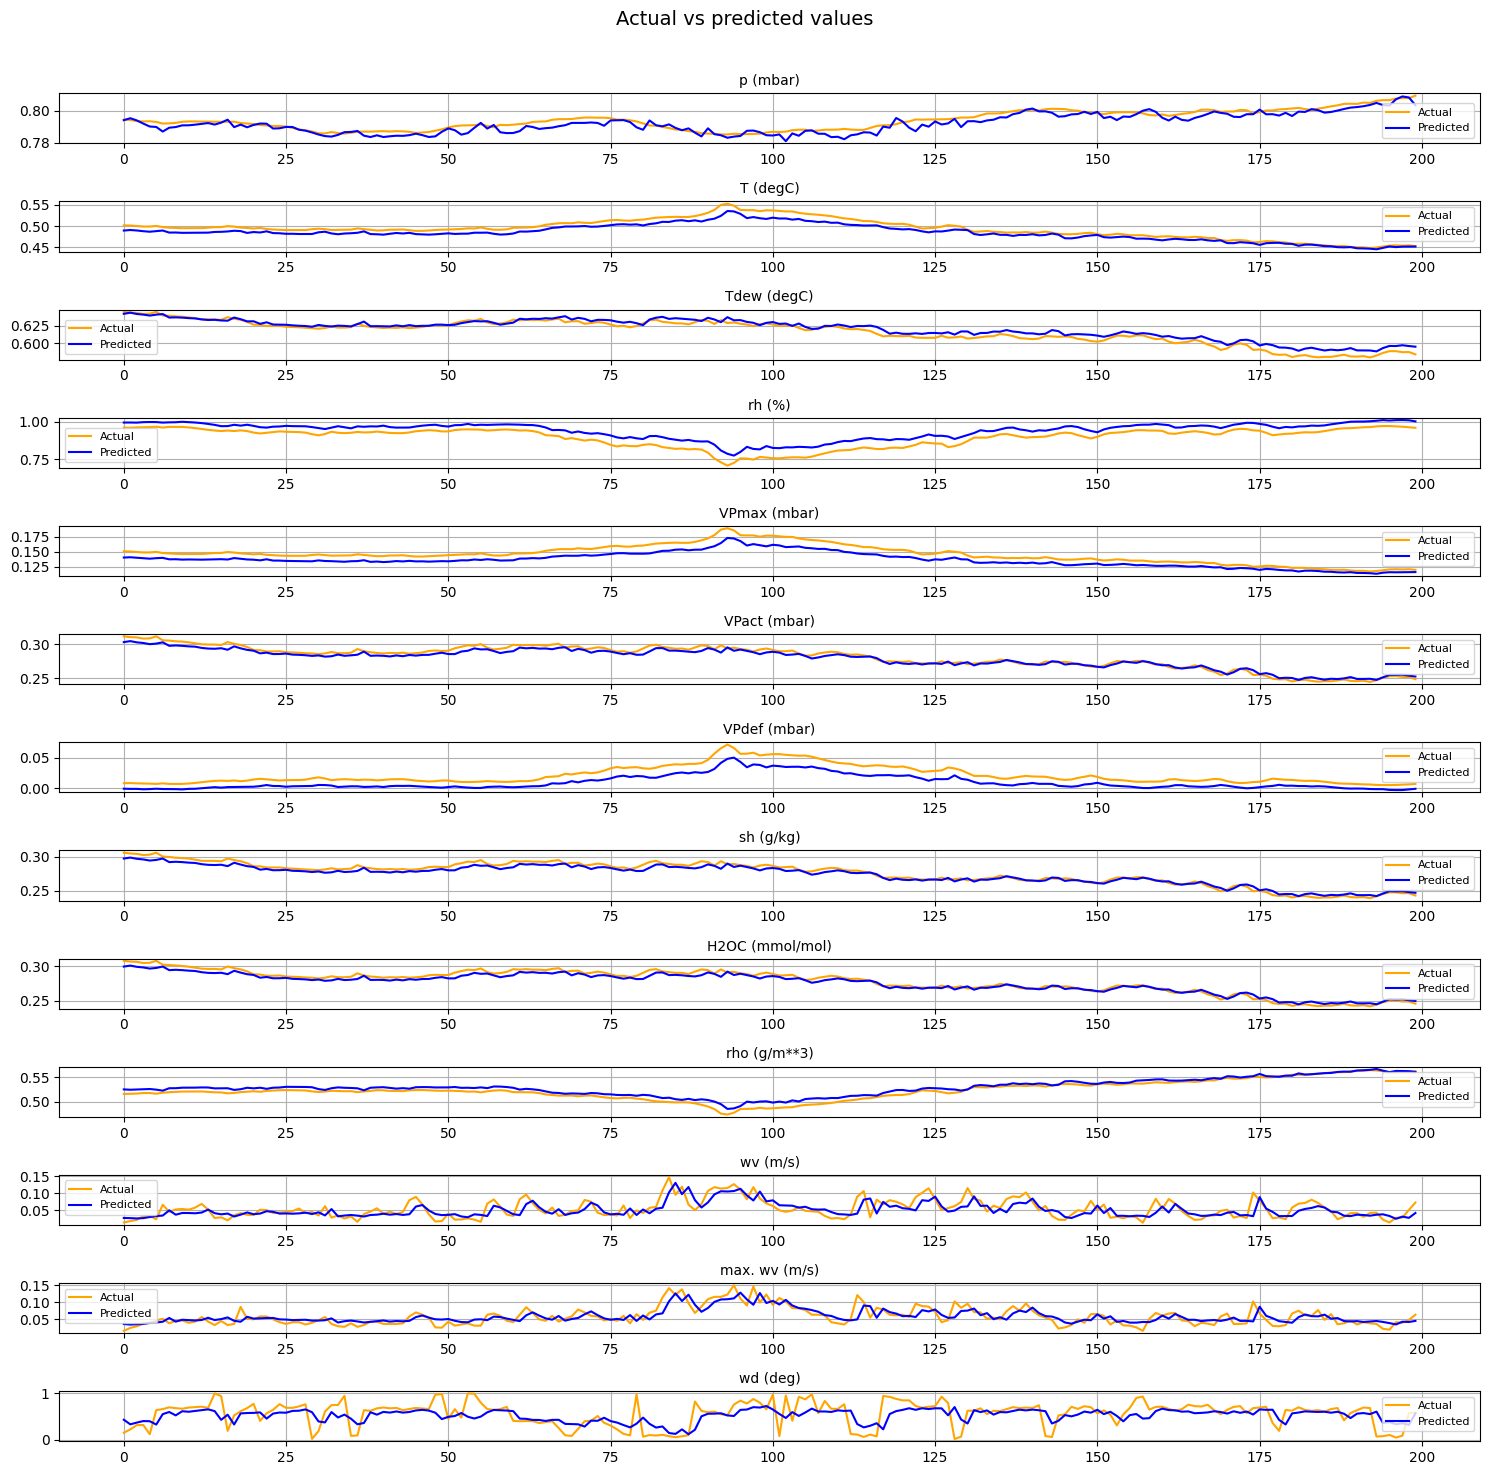

In [50]:
y_pred = model.predict(X_test)

NUMERIC_COLS = [
    "p (mbar)",
    "T (degC)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)"
]

n_features = len(NUMERIC_COLS)
n_rows, n_cols = n_features, 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

for i in range(n_features):
    ax = axes[i]
    ax.plot(y_test[:200, i], label="Actual", color='orange')
    ax.plot(y_pred[:200, i], label="Predicted", color='blue')
    ax.set_title(NUMERIC_COLS[i], fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(True)

fig.suptitle("Actual vs predicted values", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()